**Name:** Stav Yosef

**ID:** 316298876

**Colab link:** https://colab.research.google.com/drive/1WyvQVSg7MeZL0HQMxc1v-w-V53M570dO?usp=sharing

# Dry Section

## Morris

We need to change the probability that we increase our counter to $(1+beta)^{counter}$

Also we need to change the result calculation to $\frac{(1+beta)^{counter}}{beta} - 1$

 **Proof:**

$E(b^{X_{k+1}}) = \sum_{i=1}^{\infty} Pr\left[X_k=i\right]E\left[b^{X_{k+1}}|X_k=i\right] =$

$\sum_{i=1}^{\infty} Pr\left[X_k=i\right](\frac{1}{b^i}b^{i+1}+(1-\frac{1}{b^i})b^i) = $

$\sum_{i=1}^{\infty} Pr\left[X_k=i\right](b + b^j - 1) = $

$\left[\sum_{i=1}^{\infty} Pr\left[X_k=i\right]b\right] + \left[\sum_{i=1}^{\infty} Pr\left[X_k=i\right]b^j\right] + \left[\sum_{i=1}^{\infty} Pr\left[X_k=i\right](-1)\right] =$

$\left[\sum_{i=1}^{\infty} Pr\left[X_k=i\right]b\right] + b - 1 = E(b^{X_{k}}) + b - 1$

$E(b^{X_{k}})=E(b^{X_{k-1}}) + b - 1 = \ldots = E(b^{X_{0}}) + k(b - 1) = 1 + k(b-1)$

$\frac{E(b^{X_{k}}-1)}{b-1} = k$

Conclusion:

$\hat{n} = \frac{b^{X_{n}}-1}{b-1}$

If $b = 2$ Then, $\hat{n} = \frac{2^{X_{n}}-1}{1}$


## Heavy Hitters

First, for intuition let's start with an example.

Suppose $N=10$ and $L=2$ then $f_a\geq\frac{N}{L}=5$.

Assume that $a=3$ and repeats 5 times and we want to take it "out" from our backets ($L=2$),

So we need at least 6 differents items to do so, because the first different item will go the other bucket and then we need more 5 items in order to decrease $a$ to zero but we have only 4 left... Then $a$ will be in our buckets


Proof by contradiction

Suppose $N=stream_{length}, L=buckets$  then $f_a\geq\frac{N}{L}$.

Assume $a$ does not exist after we receive our stream ($N$)

Then we must decrease $a$, $f_{a}$ times $\rightarrow$ we have at least $f_{a} + 1=$ differents items.

For each decrease we "removing" L items $\rightarrow$ total of items we decreased is $(f_{a} + 1)\times{L}$ but $(\frac{N}{L} + 1)\times{L} > N$

Thus a contradiction! $\rightarrow{a}$ will be in our buckets.



$f_a - \epsilon{N} \leq \hat{f_a} \leq f_a$

$f_a \geq \hat{f_a}$ that's obvious no need to explain it...

now let's choose $L=\frac{1}{\epsilon} \rightarrow \epsilon = \frac{1}{L}$

$\frac{N}{L} = N\frac{1}{L} = N\epsilon \rightarrow f_a - \epsilon{N} \leq \hat{f_a} \leq f_a$

Left side is with the same intuition as we proof $f_a\geq\frac{N}{L}$ above.

# Wet Section

## Setup

In [ ]:
!pip install numpy mmh3

In [ ]:
import mmh3

In [ ]:
import random
import time

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
HIGH = 1000000
MAX = 2000000000

def generate_stream() -> np.ndarray:
    np.random.seed(580)
    return np.random.randint(low=0, high=HIGH, size=1000000)

## Morris

In [ ]:
# region Morris

In [ ]:
class MorrisA:
    def __init__(self):
        self.counter = 0.0
        self.prob = 1.0
        self.base = 2

    def new_item(self):
        if random.uniform(0, 1) < self.prob:
            self.counter += 1.0
            self.prob /= self.base

    def get_result(self) -> int:
        return (np.power(self.base, self.counter) - 1) / (self.base - 1)

In [ ]:
class MorrisB:
    def __init__(self, s):
        self.s = s
        self.morris_a = [MorrisA() for _ in range(self.s)]

    def new_item(self):
        for m in self.morris_a:
            m.new_item()

    def get_result(self) -> (int, list):
        result = 0
        results =[]
        for m in self.morris_a:
            res = m.get_result()
            result += res
            results.append(res)

        return int(result / self.s), results

In [ ]:
def simulation_morris(s: int):
    start_time = time.time()

    stream = generate_stream()

    morris_b = MorrisB(s=s)
    for i in stream:
        morris_b.new_item()

    result = morris_b.get_result()
    real_result = len(stream)
    print("Stream length:", real_result)
    print("Morris result:", result[0], result[1])

    print("\nExpectation:", np.round(np.mean(result[1]), 3))
    print("Normalized Variance:", np.round(np.var(result[1]) / real_result, 3))

    deviation = np.round(a=np.abs(1 - (result[0] / real_result)) * 100, decimals=5)
    print(f'\nDeviation: {deviation}%')
    print(time.time() - start_time)

In [ ]:
simulation_morris(10)

Stream length: 1000000
Morris result: 1441791 [2097151.0, 1048575.0, 262143.0, 1048575.0, 2097151.0, 1048575.0, 524287.0, 1048575.0, 4194303.0, 1048575.0]

Expectation: 1441791.0
Normalized Variance: 1144179.288

Deviation: 44.1791%
4.363743543624878



---


In [ ]:
simulation_morris(50)

Stream length: 1000000
Morris result: 1148189 [524287.0, 524287.0, 1048575.0, 524287.0, 1048575.0, 524287.0, 1048575.0, 1048575.0, 2097151.0, 1048575.0, 2097151.0, 2097151.0, 1048575.0, 1048575.0, 1048575.0, 524287.0, 2097151.0, 524287.0, 524287.0, 2097151.0, 2097151.0, 1048575.0, 524287.0, 524287.0, 2097151.0, 1048575.0, 524287.0, 524287.0, 2097151.0, 1048575.0, 524287.0, 4194303.0, 524287.0, 2097151.0, 1048575.0, 2097151.0, 524287.0, 2097151.0, 524287.0, 1048575.0, 524287.0, 1048575.0, 524287.0, 262143.0, 1048575.0, 2097151.0, 524287.0, 1048575.0, 1048575.0, 524287.0]

Expectation: 1148189.72
Normalized Variance: 568694.902

Deviation: 14.8189%
20.043036699295044



---


In [ ]:
simulation_morris(100)

Stream length: 1000000
Morris result: 1006631 [1048575.0, 4194303.0, 1048575.0, 2097151.0, 1048575.0, 1048575.0, 524287.0, 1048575.0, 524287.0, 2097151.0, 524287.0, 1048575.0, 524287.0, 1048575.0, 524287.0, 1048575.0, 1048575.0, 262143.0, 2097151.0, 524287.0, 2097151.0, 2097151.0, 1048575.0, 262143.0, 1048575.0, 1048575.0, 2097151.0, 524287.0, 2097151.0, 524287.0, 1048575.0, 1048575.0, 1048575.0, 262143.0, 1048575.0, 2097151.0, 262143.0, 262143.0, 524287.0, 1048575.0, 262143.0, 1048575.0, 524287.0, 2097151.0, 1048575.0, 524287.0, 1048575.0, 524287.0, 524287.0, 262143.0, 1048575.0, 524287.0, 1048575.0, 524287.0, 1048575.0, 524287.0, 262143.0, 262143.0, 2097151.0, 2097151.0, 1048575.0, 2097151.0, 1048575.0, 1048575.0, 524287.0, 1048575.0, 524287.0, 2097151.0, 1048575.0, 1048575.0, 524287.0, 2097151.0, 2097151.0, 1048575.0, 1048575.0, 524287.0, 262143.0, 2097151.0, 1048575.0, 524287.0, 1048575.0, 1048575.0, 1048575.0, 524287.0, 524287.0, 1048575.0, 1048575.0, 262143.0, 1048575.0, 1048575.

In [ ]:
# endregion


---

### Graphs

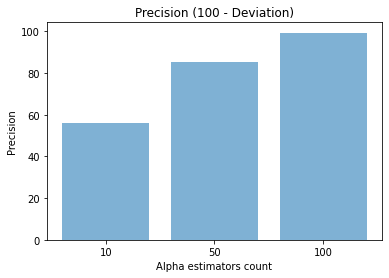

In [ ]:
alphas = [10, 50, 100]
xticks = np.arange(len(alphas))
deviation = [44.1791, 14.8189, 0.6631]
precision = 100 - np.array(deviation)

plt.bar(xticks, precision, align='center', alpha=0.57)
plt.xticks(xticks, alphas)

plt.xlabel("Alpha estimators count")
plt.ylabel('Precision')
plt.title('Precision (100 - Deviation)')

plt.show()

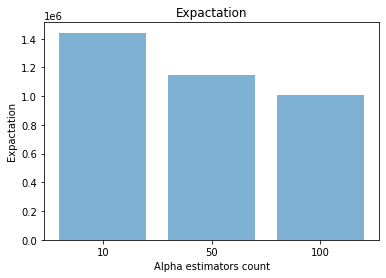

In [ ]:
alphas = [10, 50, 100]
xticks = np.arange(len(alphas))
means = [1441791.0, 1148189.72, 1006631.96]

plt.bar(xticks, means, align='center', alpha=0.57)
plt.xticks(xticks, alphas)

plt.xlabel("Alpha estimators count")
plt.ylabel('Expactation')
plt.title('Expactation')

plt.show()

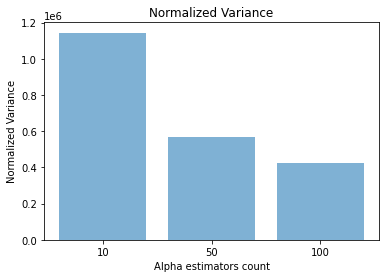

In [ ]:
alphas = [10, 50, 100]
xticks = np.arange(len(alphas))
norm_vars = [1144179.288, 568694.902, 424301.537]

plt.bar(xticks, norm_vars, align='center', alpha=0.57)
plt.xticks(xticks, alphas)

plt.xlabel("Alpha estimators count")
plt.ylabel('Normalized Variance')
plt.title('Normalized Variance')

plt.show()

## Flajolet Martin

In [ ]:
# region Flajolet Martin

In [ ]:
class FlajoletMartinA:
    def __init__(self, offset: int):
        self.offset = offset
        self.x = 1.0
        self.MAX = MAX / 5.5
        # Need to be 2^32

    def set_offset(self, offset: int):
        self.offset = offset

    def _hash(self, item: str) -> float:
        return np.abs(mmh3.hash(key=item, seed=self.offset) / self.MAX)

    def new_item(self, item):
        self.x = min(self._hash(item), self.x)

    def get_result(self) -> int:
        return int(1.0 / self.x)

In [ ]:
class FlajoletMartinB:
    def __init__(self, s: int):
        self.s = s
        self.fm_a = [FlajoletMartinA(offset=_) for _ in range(self.s)]

    def get_fm_a(self):
        return self.fm_a

    def new_item(self, item):
        for _ in self.fm_a:
            _.new_item(item=item)

    def get_result(self) -> (int, list):
        res = 0.0
        arr = []
        for fm in self.fm_a:
            res += fm.get_result()
            arr.append(fm.get_result())

        return int(res / self.s) - 1, arr

In [ ]:
class FlajoletMartinFinalVersion:
    def __init__(self, s: int, s_a: int):
        self.s = s
        self.fm_b = [FlajoletMartinB(s=s_a) for _ in range(self.s)]

        offset = 0
        for fm_b in self.fm_b:
            fms = fm_b.get_fm_a()
            for _ in fms:
                _.set_offset(offset=offset)
                offset += 1

    def new_item(self, item):
        for _ in self.fm_b:
            _.new_item(item=item)

    def get_result(self) -> (int, list):
        res = []
        for _ in self.fm_b:
            res.append(_.get_result()[0])

        return np.median(res) - 1, res

In [ ]:
def simulation_fm_b(fm_b_a: int):
    start_time = time.time()

    stream = generate_stream()

    fm_b = FlajoletMartinB(s=fm_b_a)

    for item in stream:
        fm_b.new_item(item=item)

    result = fm_b.get_result()
    real_result = len(np.unique(stream))
    print("Uniques:", real_result)
    print("FM result:", result)
    print("FM final result:", result[0])

    deviation = np.round(np.abs(1 - ((result[0] * 1.0) / (real_result * 1.0))) * 100, 3)
    print(f'Deviation: {deviation}%')
    # print(time.time() - start_time)

In [ ]:
def simulation_fm_fv(fm_b_n: int, fm_a_n: int):
    start_time = time.time()

    stream = generate_stream()

    fm_fv = FlajoletMartinFinalVersion(s=fm_b_n, s_a=fm_a_n)

    ll = len(stream)
    for item in range(len(stream)):
        fm_fv.new_item(item=stream[item])

    result = fm_fv.get_result()
    real_result = len(np.unique(stream))
    print("Uniques:", real_result)
    print("FM result:", result)
    print("FM final result:", result[0])

    deviation = np.round(np.abs(1 - ((result[0] * 1.0) / (real_result * 1.0))) * 100, 3)
    print(f'Deviation: {deviation}%')
    # print(time.time() - start_time)

In [ ]:
def exp_norm_var(arr, real_result):
    print("\nExpectation:", np.round(np.mean(arr), 3))
    print("Normalized Variance:", np.round(np.var(arr) / real_result, 3))

In [ ]:
simulation_fm_b(fm_b_a=10)

Uniques: 631815
FM result: (1030182, [1271455, 153887, 138107, 274028, 246533, 57328, 53586, 7905138, 112164, 89609])
FM final result: 1030182
Deviation: 63.051%


In [ ]:
results = np.array([1271455, 153887, 138107, 274028, 246533, 57328, 53586, 7905138, 112164, 89609])
exp_norm_var(results, 1030182)


Expectation: 1030183.5
Normalized Variance: 5212711.666



---

In [ ]:
simulation_fm_b(fm_b_a=50)

Uniques: 631815
FM result: (993680, [1271455, 153887, 138107, 274028, 246533, 57328, 53586, 7905138, 112164, 89609, 344679, 25974025, 52854, 379182, 79137, 743632, 212652, 584624, 560302, 102231, 256262, 625880, 549299, 149891, 321233, 60135, 65027, 96814, 603045, 298552, 168194, 275900, 29160, 92717, 69053, 168976, 727272, 64144, 837871, 624804, 154804, 174405, 104553, 56951, 194042, 331785, 63406, 69316, 110192, 3005259])
FM final result: 993680
Deviation: 57.274%


In [ ]:
results = np.array([1271455, 153887, 138107, 274028, 246533, 57328, 53586, 7905138, 112164, 89609, 344679, 25974025, 52854, 379182, 79137, 743632, 212652, 584624, 560302, 102231, 256262, 625880, 549299, 149891, 321233, 60135, 65027, 96814, 603045, 298552, 168194, 275900, 29160, 92717, 69053, 168976, 727272, 64144, 837871, 624804, 154804, 174405, 104553, 56951, 194042, 331785, 63406, 69316, 110192, 3005259])
exp_norm_var(results, 993680)


Expectation: 993681.9
Normalized Variance: 14159996.59



---

In [ ]:
simulation_fm_b(fm_b_a=100)

Uniques: 631815
FM result: (645779, [1271455, 153887, 138107, 274028, 246533, 57328, 53586, 7905138, 112164, 89609, 344679, 25974025, 52854, 379182, 79137, 743632, 212652, 584624, 560302, 102231, 256262, 625880, 549299, 149891, 321233, 60135, 65027, 96814, 603045, 298552, 168194, 275900, 29160, 92717, 69053, 168976, 727272, 64144, 837871, 624804, 154804, 174405, 104553, 56951, 194042, 331785, 63406, 69316, 110192, 3005259, 116624, 1241079, 67128, 100175, 307125, 328785, 77320, 384393, 81060, 460882, 507872, 142938, 112372, 44194, 306349, 71624, 159559, 3162055, 427807, 57784, 182731, 73536, 335457, 49521, 119068, 351000, 113388, 230441, 693962, 241458, 203262, 44854, 37886, 267576, 40475, 161759, 1180637, 170162, 139645, 57103, 115881, 77833, 52457, 110293, 120449, 94011, 218400, 725821, 35713, 492065])
FM final result: 645779
Deviation: 2.21%


In [ ]:
results = np.array([1271455, 153887, 138107, 274028, 246533, 57328, 53586, 7905138, 112164, 89609, 344679, 25974025, 52854, 379182, 79137, 743632, 212652, 584624, 560302, 102231, 256262, 625880, 549299, 149891, 321233, 60135, 65027, 96814, 603045, 298552, 168194, 275900, 29160, 92717, 69053, 168976, 727272, 64144, 837871, 624804, 154804, 174405, 104553, 56951, 194042, 331785, 63406, 69316, 110192, 3005259, 116624, 1241079, 67128, 100175, 307125, 328785, 77320, 384393, 81060, 460882, 507872, 142938, 112372, 44194, 306349, 71624, 159559, 3162055, 427807, 57784, 182731, 73536, 335457, 49521, 119068, 351000, 113388, 230441, 693962, 241458, 203262, 44854, 37886, 267576, 40475, 161759, 1180637, 170162, 139645, 57103, 115881, 77833, 52457, 110293, 120449, 94011, 218400, 725821, 35713, 492065])
exp_norm_var(results, 645779)


Expectation: 645780.64
Normalized Variance: 11262375.323



---

In [ ]:
simulation_fm_fv(fm_b_n=10, fm_a_n=10)

Uniques: 631815
FM result: (311131.0, [1030182, 2903330, 302612, 305808, 426470, 316456, 499254, 239055, 230334, 204291])
FM final result: 311131.0
Deviation: 50.756%


In [ ]:
results = np.array([1030182, 2903330, 302612, 305808, 426470, 316456, 499254, 239055, 230334, 204291])
exp_norm_var(results, 311131.0)


Expectation: 645779.2
Normalized Variance: 1989064.516



---

In [ ]:
simulation_fm_fv(fm_b_n=10, fm_a_n=50)

Uniques: 631815
FM result: (503119.0, [993680, 297878, 402539, 1098061, 267597, 461097, 529536, 616960, 476704, 751355])
FM final result: 503119.0
Deviation: 20.369%


In [ ]:
results = np.array([993680, 297878, 402539, 1098061, 267597, 461097, 529536, 616960, 476704, 751355])
exp_norm_var(results, 503119.0)


Expectation: 589540.7
Normalized Variance: 140199.861



---

In [ ]:
simulation_fm_fv(fm_b_n=10, fm_a_n=100)

Uniques: 631815
FM result: (615499.0, [645779, 750300, 364347, 573248, 614029, 485254, 856785, 616971, 504353, 942088])
FM final result: 615499.0
Deviation: 2.582%


In [ ]:
results = np.array([645779, 750300, 364347, 573248, 614029, 485254, 856785, 616971, 504353, 942088])
exp_norm_var(results, 615499.0)


Expectation: 635315.4
Normalized Variance: 44553.215



---

In [ ]:
simulation_fm_fv(fm_b_n=50, fm_a_n=10)

Uniques: 631815
FM result: (430428.5, [1030182, 2903330, 302612, 305808, 426470, 316456, 499254, 239055, 230334, 204291, 317267, 304483, 490128, 674193, 226625, 3283759, 533262, 891606, 144772, 636908, 294897, 187844, 298221, 275393, 281631, 802859, 269088, 431395, 591028, 211117, 441366, 602244, 270294, 1028941, 304835, 592734, 343471, 719795, 999336, 429464, 750295, 174900, 137917, 686724, 633686, 865753, 358705, 592753, 658868, 1280694])
FM final result: 430428.5
Deviation: 31.874%


In [ ]:
results = np.array([1030182, 2903330, 302612, 305808, 426470, 316456, 499254, 239055, 230334, 204291, 317267, 304483, 490128, 674193, 226625, 3283759, 533262, 891606, 144772, 636908, 294897, 187844, 298221, 275393, 281631, 802859, 269088, 431395, 591028, 211117, 441366, 602244, 270294, 1028941, 304835, 592734, 343471, 719795, 999336, 429464, 750295, 174900, 137917, 686724, 633686, 865753, 358705, 592753, 658868, 1280694])
exp_norm_var(results, 430428.5)


Expectation: 589540.86
Normalized Variance: 772024.682



---

In [ ]:
simulation_fm_fv(fm_b_n=50, fm_a_n=50)

Uniques: 631815
FM result: (582977.5, [993680, 297878, 402539, 1098061, 267597, 461097, 529536, 616960, 476704, 751355, 705378, 265130, 1283887, 429683, 464951, 768991, 393454, 615251, 391968, 1492207, 229565, 682703, 283856, 247919, 577090, 647451, 588867, 260066, 535367, 574626, 934118, 940783, 1508560, 3103660, 1084121, 411451, 1148087, 608931, 223505, 1286578, 1318395, 295213, 465066, 1819480, 788402, 917242, 862922, 421473, 292313, 310574])
FM final result: 582977.5
Deviation: 7.73%


In [ ]:
results = np.array([993680, 297878, 402539, 1098061, 267597, 461097, 529536, 616960, 476704, 751355, 705378, 265130, 1283887, 429683, 464951, 768991, 393454, 615251, 391968, 1492207, 229565, 682703, 283856, 247919, 577090, 647451, 588867, 260066, 535367, 574626, 934118, 940783, 1508560, 3103660, 1084121, 411451, 1148087, 608931, 223505, 1286578, 1318395, 295213, 465066, 1819480, 788402, 917242, 862922, 421473, 292313, 310574])
exp_norm_var(results, 582977.5)


Expectation: 721493.82
Normalized Variance: 447483.23



---

In [ ]:
simulation_fm_fv(fm_b_n=50, fm_a_n=100)

Uniques: 631815
FM result: (634438.5, [645779, 750300, 364347, 573248, 614029, 485254, 856785, 616971, 504353, 942088, 456134, 265887, 612270, 424466, 554996, 937450, 2306110, 747786, 878509, 755042, 806804, 1142273, 852822, 642197, 301443, 382023, 562563, 840353, 1930655, 1223496, 642668, 674528, 438738, 513408, 393908, 4045342, 776624, 431408, 670881, 626682, 493191, 624689, 856243, 355187, 362456, 564134, 720679, 642344, 4265100, 428185])
FM final result: 634438.5
Deviation: 0.415%


In [ ]:
results = np.array([645779, 750300, 364347, 573248, 614029, 485254, 856785, 616971, 504353, 942088, 456134, 265887, 612270, 424466, 554996, 937450, 2306110, 747786, 878509, 755042, 806804, 1142273, 852822, 642197, 301443, 382023, 562563, 840353, 1930655, 1223496, 642668, 674528, 438738, 513408, 393908, 4045342, 776624, 431408, 670881, 626682, 493191, 624689, 856243, 355187, 362456, 564134, 720679, 642344, 4265100, 428185])
exp_norm_var(results, 634438.5)


Expectation: 830056.56
Normalized Variance: 926956.049


### Graphs

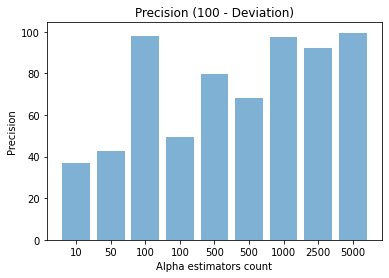

In [ ]:
alphas = [10, 50, 100, 100, 500 ,500, 1000, 2500, 5000]
xticks = np.arange(len(alphas))
deviation = [63.051,57.274,2.21,50.756,20.369,31.874, 2.582,7.73,0.415]
precision = 100 - np.array(deviation)

plt.bar(xticks, precision, align='center', alpha=0.57)
plt.xticks(xticks, alphas)

plt.xlabel("Alpha estimators count")
plt.ylabel('Precision')
plt.title('Precision (100 - Deviation)')

plt.show()

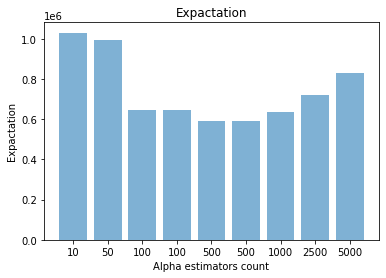

In [ ]:
alphas = [10, 50, 100, 100, 500 ,500, 1000, 2500, 5000]
xticks = np.arange(len(alphas))
means = [1030183.5,993681.9,645780.64,645779.2,589540.7,589540.86, 635315.4,721493.82,830056.56]

plt.bar(xticks, means, align='center', alpha=0.57)
plt.xticks(xticks, alphas)

plt.xlabel("Alpha estimators count")
plt.ylabel('Expactation')
plt.title('Expactation')

plt.show()

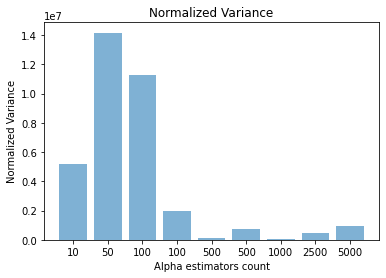

In [ ]:
alphas = [10, 50, 100, 100, 500 ,500, 1000, 2500, 5000]
xticks = np.arange(len(alphas))
norm_vars = [5212711.666,14159996.59,11262375.323,1989064.516,140199.861,772024.682,44553.215,447483.23,926956.049]

plt.bar(xticks, norm_vars, align='center', alpha=0.57)
plt.xticks(xticks, alphas)

plt.xlabel("Alpha estimators count")
plt.ylabel('Normalized Variance')
plt.title('Normalized Variance')

plt.show()

## Analysis

Graphs exists under each algorithm

### Alpha estimators

$s=\frac{1}{\delta\epsilon^2} \rightarrow \epsilon=\sqrt{\frac{1}{s\delta}}$

In our cases:

>s=10: $\epsilon=\sqrt{\frac{1}{10\times0.01}} = \sqrt{10}=3.162\sim$

>s=50: $\epsilon=\sqrt{\frac{1}{50\times0.01}} = \sqrt{2}=1.414\sim$

>s=100: $\epsilon=\sqrt{\frac{1}{100\times0.01}} = 1$

>s=250: $\epsilon=\sqrt{\frac{1}{250\times0.01}} = \frac{\sqrt{10}}{5}=0.632\sim$

>s=500: $\epsilon=\sqrt{\frac{1}{250\times0.01}} = \frac{\sqrt{5}}{5}=0.447\sim$

>s=1000: $\epsilon=\sqrt{\frac{1}{100\times0.01}} = \frac{\sqrt{10}}{10} = 0.316\sim$

>s=2500: $\epsilon=\sqrt{\frac{1}{250\times0.01}} = \frac{1}{5}$


>s=5000: $\epsilon=\sqrt{\frac{1}{250\times0.01}} = \frac{\sqrt{2}}{10}=0.141\sim$


### Space

#### Morris

Alpha version - $log({log{(n)}})$

Beta version - $s\times log({log{(n)}})$ where $s$ is the number of alphas copies

In [ ]:
def plot_morris_space(n, s):
    x = [i for i in range(2, n+1, 1)]
    y = [s * np.math.log2(np.math.log2(i)) for i in x]
    plt.plot(x, y)
    plt.title(f'N - {n}\nCopies - {s}')
    plt.show()

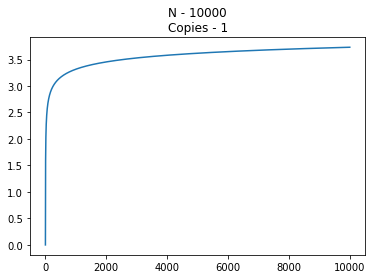

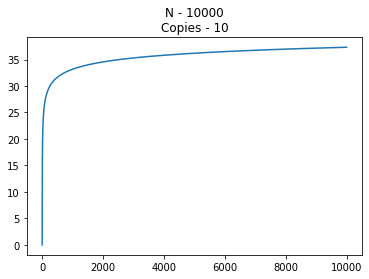

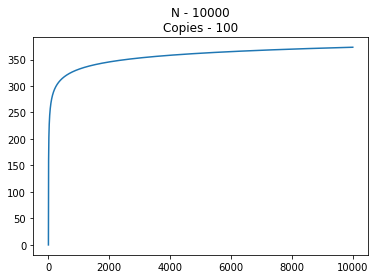

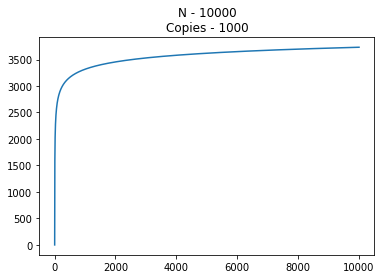

In [ ]:
plot_morris_space(10000, 1)
plot_morris_space(10000, 10)
plot_morris_space(10000, 100)
plot_morris_space(10000, 1000)

We can see unbiasedness when we subtracting minus 1 in the final result (Morris alpha version)

#### Flajolet Martin

In [ ]:
import sys

print(sys.getsizeof(0.999999999), "bytes")
print(sys.getsizeof(0.000000001), "bytes")

24 bytes
24 bytes


We can see that for each value we need only 24 bytes therefore each alpha estimator will require:

**24 bytes**.

beta contains $\alpha$ alpha estimators so each beta estimator will require:

**$\alpha \times$ 24 bytes**

Best for last, each final version contains $\beta $ beta estimators and each of the beta contains $\alpha$ alpha estimators.

so in the end our FM final version will require:

**$\beta\times\alpha \times$ 24 bytes**